<a href="https://colab.research.google.com/github/Imeneallouche/Machine-Learning/blob/main/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Regression**

Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


# **Pandas Library**

Pandas allows us to import csv files

In [4]:
import pandas

dataset = pandas.read_csv("data.csv")
dataset

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


# **How Does it Work?**

---



## **1- make a list of dependent and independent values**
TIP: It is common to name the list of independent values with an 
upper case X, and the list of dependent values with a lower case y.

In [5]:
X = dataset[['Weight' , 'Volume']]
y= dataset['CO2']
print("types of arrays: ",type(X), type(y))
print(X,"\n\n")
print(y)

types of arrays:  <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
    Weight  Volume
0      790    1000
1     1160    1200
2      929    1000
3      865     900
4     1140    1500
5      929    1000
6     1109    1400
7     1365    1500
8     1112    1500
9     1150    1600
10     980    1100
11     990    1300
12    1112    1000
13    1252    1600
14    1326    1600
15    1330    1600
16    1365    1600
17    1280    2200
18    1119    1600
19    1328    2000
20    1584    1600
21    1428    2000
22    1365    2100
23    1415    1600
24    1415    2000
25    1465    1500
26    1490    2000
27    1725    2000
28    1523    1600
29    1705    2000
30    1605    2100
31    1746    2000
32    1235    1600
33    1390    1600
34    1405    1600
35    1395    2500 


0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
15     97
16     99
17    104
18    104
19    105
20

# **2-Use LinearRegression() in linear model**


---



From sklearn module use the LinearRegression() method to create a linear regression object.

This object has a method called fit() that takes the independent and dependent values as parameters and fills the regression object with data that describes the relationship:

In [6]:
from sklearn import linear_model
regression = linear_model.LinearRegression()
regression.fit(X,y)


LinearRegression()

# **3- Predict Future values:**

Now we have a regression object (predictCO2) ready to predict CO2 values based on a car's weight and volume

We have predicted that a car with 1.3 liter engine, and a weight of 2300 kg, will release approximately 107 grams of CO2 for every kilometer it drives.

In [7]:
#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regression.predict([[2300, 1300]])
print(predictedCO2)

[107.2087328]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# **4- Coefficient**
The coefficient is a factor that describes the relationship with an unknown variable.

coef_array of shape (n_features, ) or (n_targets, n_features)
Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

In [8]:
from sklearn import linear_model                   #sklearn for the linear regression functions
import pandas                                      #pandas for reading the csv files

dataset = pandas.read_csv("data.csv")              #read the csv file

X = dataset[["Weight", "Volume"]]                  #independent values
y = dataset["CO2"]                                 #dependent values

regression = linear_model.LinearRegression()       #the regression model is saved in the variable regression
regression.fit(X,y)                                #the best function is calculated via the fit method


print(regression.coef_)                            #Coeffiicent for the relationship between Weight/Volume and CO2       

[0.00755095 0.00780526]


# **Result Expalined**

The result array represents the coefficient values of weight and volume.

**Weight: 0.00755095**

**Volume: 0.00780526**

These values tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g.

And if the engine size (Volume) increases by 1 cm3, the CO2 emission increases by 0.00780526 g.

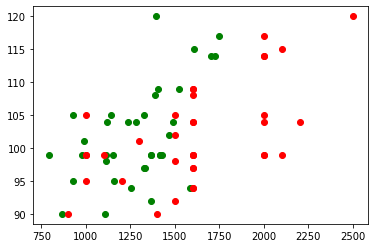

In [11]:
import matplotlib.pyplot as plt

CO2Values = y.to_numpy()
WeightValues = dataset["Weight"].to_numpy()
VolumeValues = dataset["Volume"].to_numpy()

plt.scatter(WeightValues, CO2Values, color='green')
plt.scatter(VolumeValues, CO2Values, color='red')
plt.show()
